In [1]:
import numpy as np
import pandas as pd
import datetime
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import  Counter
import missingno as mn
import datetime
from scipy import stats
from sklearn.model_selection import cross_val_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
### Importing Dataset
data = pd.read_csv('C:/Users/Vishal/Jupyter notebooks/Data Mining 1/Project/marketing_campaign.csv', sep='\t')
print("There are", len(data), "observations and", len(data.columns), "variables in the dataset.")
data.describe()
data.info()
data.head()

There are 2240 observations and 29 variables in the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 n

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


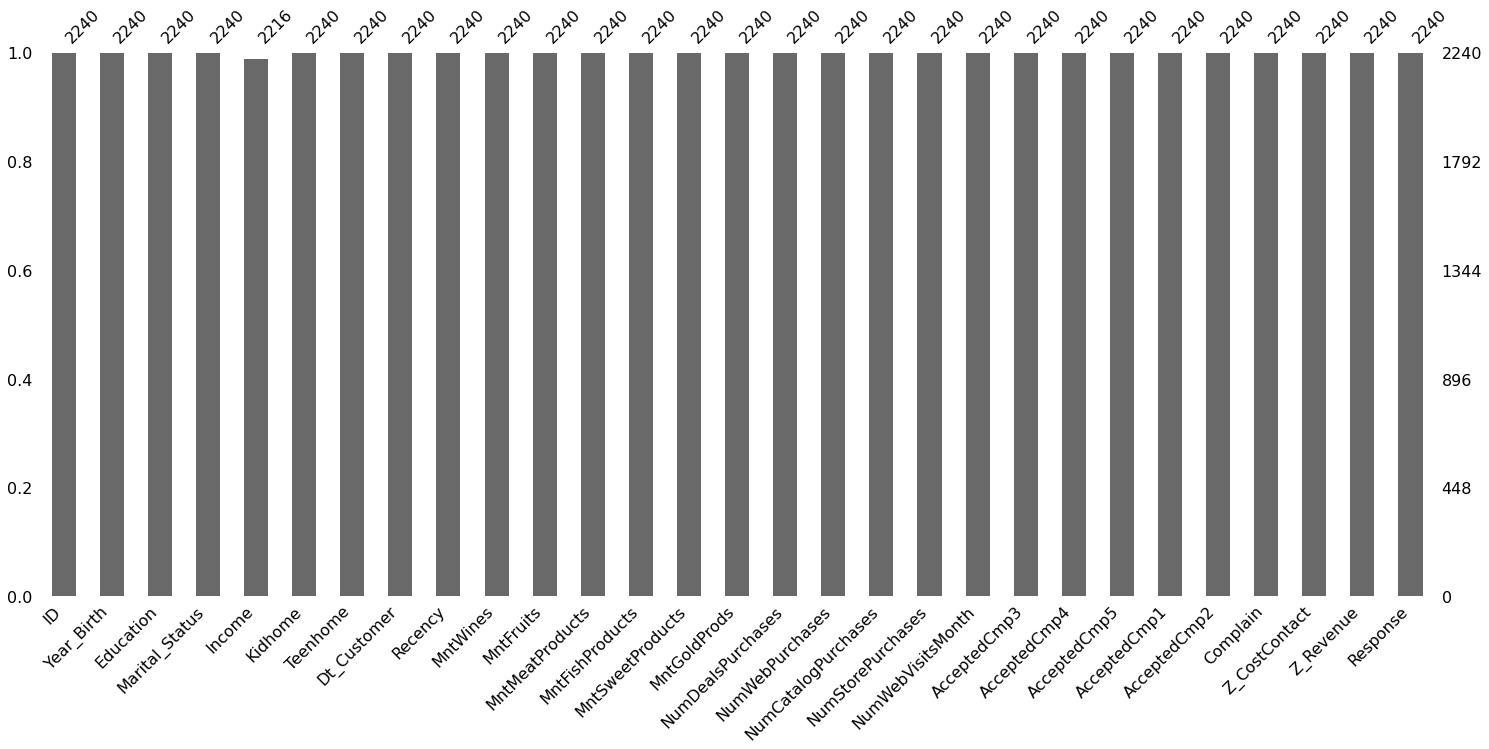

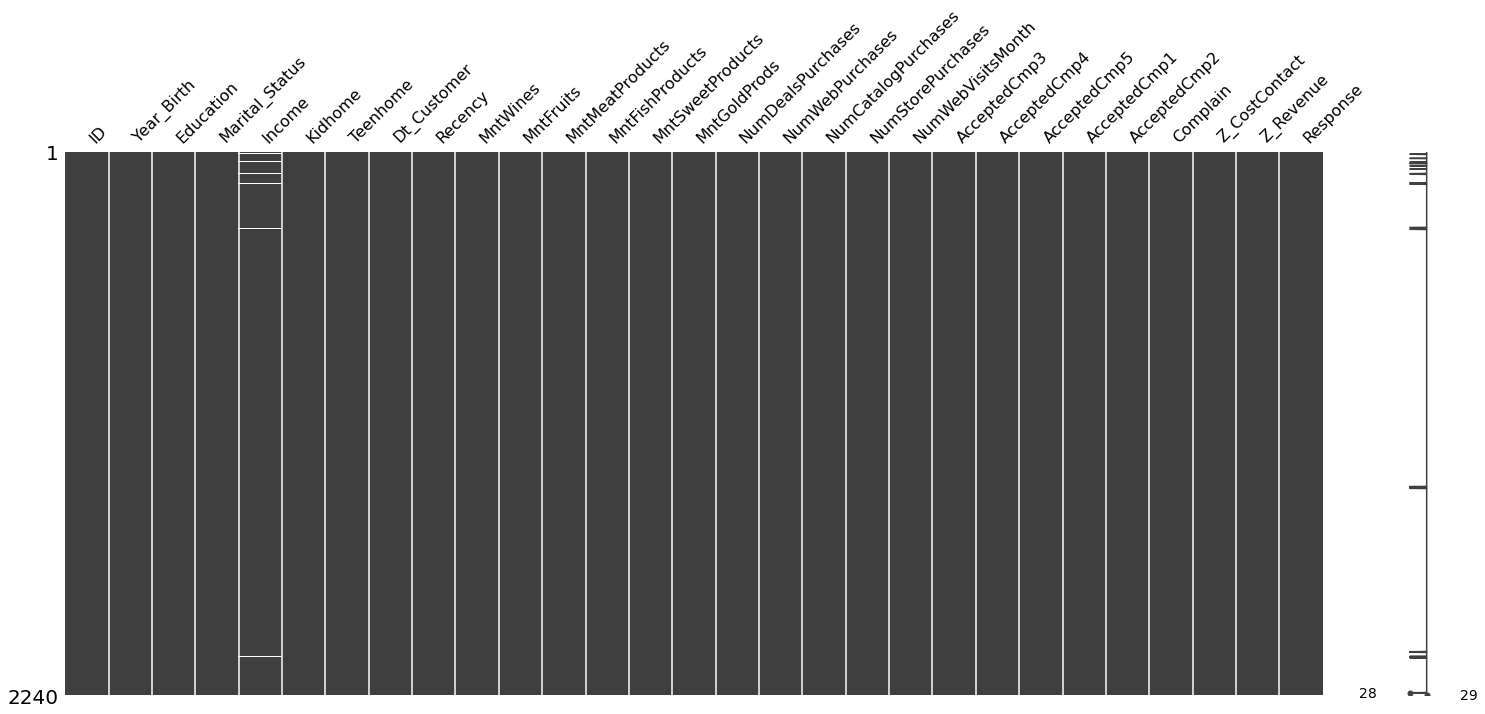

In [3]:
# Visualising the missing values
plt.subplot(1, 1, 1) # row 1, col 2 index 1
mn.bar(data) # shows which variable has NAs # row 1, col 2 index 1
mn.matrix(data) 

# shows which Customer's data is missing
data.Income.describe()

# Mean Imputation for Income variable
data['Income']=data['Income'].fillna(data['Income'].median())
data.isna().any() # There is no NA values.
data

In [4]:
data['Marital_Status'] = data['Marital_Status'].str.replace('Absurd', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Alone', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('YOLO', 'Single')
data['Education'] = data['Education'].str.replace('2n Cycle', 'Master')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
### Preprocessing

#Change date format
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])
data.Dt_Customer.describe()

# While the registration date of the newest customer in the records is 2014-12-06, the registration date of the oldest customer in the records is 2012-01-08.
data["Customer_date"]= (datetime.datetime.now()-data["Dt_Customer"]).dt.days
data["Age"] = 2022-data["Year_Birth"]

# Variable which indicates how many members exist in the house
data["Family_Size"] = data["Marital_Status"].replace({"Single": 1, "Widow": 1, "Divorced": 1, "Married": 2 , "Together":2})+ data["Kidhome"] + data["Teenhome"]

# Now, Customer_date is a numeric value where 0 represents today. As the date approaches today, the value of the variable approaches zero.
data[data.duplicated(['ID'])].size # There is no duplicate in dataset.
# There is no duplication in the data.

# Dropping the variables Z_CostContact, Z_Revenue, ID, Complain
data = data.drop(columns=["Z_CostContact", "Z_Revenue", "ID", "Complain"],axis=1)

data

C:\Users\Vishal\AppData\Local\Temp/ipykernel_5232/2599805638.py:4: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])
C:\Users\Vishal\AppData\Local\Temp/ipykernel_5232/2599805638.py:4: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])
C:\Users\Vishal\AppData\Local\Temp/ipykernel_5232/2599805638.py:4: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])
C:\Users\Vishal\AppData\Local\Temp/ipykernel_5232/2599805638.py:4: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"]= 

C:\Users\Vishal\AppData\Local\Temp/ipykernel_5232/2599805638.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.Dt_Customer.describe()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Age,Family_Size
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,1,3702,65,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,2856,68,3
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3203,57,2
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,2796,38,3
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3052,41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3272,55,3
2236,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,7,0,0,0,1,0,0,2792,76,5
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3046,41,1
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3047,66,3


In [6]:
# Renaming columns
data = data.rename(columns={"MntFruits":"Fruits","MntWines": "Wines","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","MntMeatProducts":"Meat"})
data

# Removing some variables
data = data.drop(columns=['Year_Birth', 'Dt_Customer'])

# data
pd.set_option('display.max_columns', None) # too see all the columns
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Age,Family_Size
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3702,65,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2856,68,3
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3203,57,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2796,38,3
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3052,41,3


In [7]:
# Income
data = data[(np.abs(stats.zscore(data['Income'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])
data
# Age
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]
#Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
#Reset index
data = data.drop(columns=['index'])
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Age,Family_Size
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3702,65,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2856,68,3
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3203,57,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2796,38,3
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3052,41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3272,55,3
2225,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,2792,76,5
2226,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3046,41,1
2227,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3047,66,3


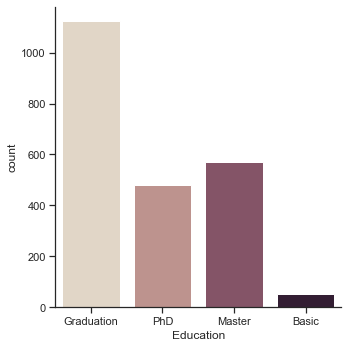

In [8]:
# Education
sns.set_theme(style="ticks", color_codes=True)
              
sns.catplot(x="Education", kind="count", palette="ch:.25", data=data)

In [9]:
# Encoding
data1 = data.copy()
encoder= LabelEncoder()
data["Education"]= data[["Education"]].apply(encoder.fit_transform)
data["Marital_Status"]= data[["Marital_Status"]].apply(encoder.fit_transform)
data = pd.get_dummies(data, columns = ['Marital_Status'])
# data.info()
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Age,Family_Size,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3702,65,1,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2856,68,3,0,0,1,0,0
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3203,57,2,0,0,0,1,0
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2796,38,3,0,0,0,1,0
4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3052,41,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,1,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3272,55,3,0,1,0,0,0
2225,3,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,2792,76,5,0,0,0,1,0
2226,1,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3046,41,1,1,0,0,0,0
2227,2,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3047,66,3,0,0,0,1,0


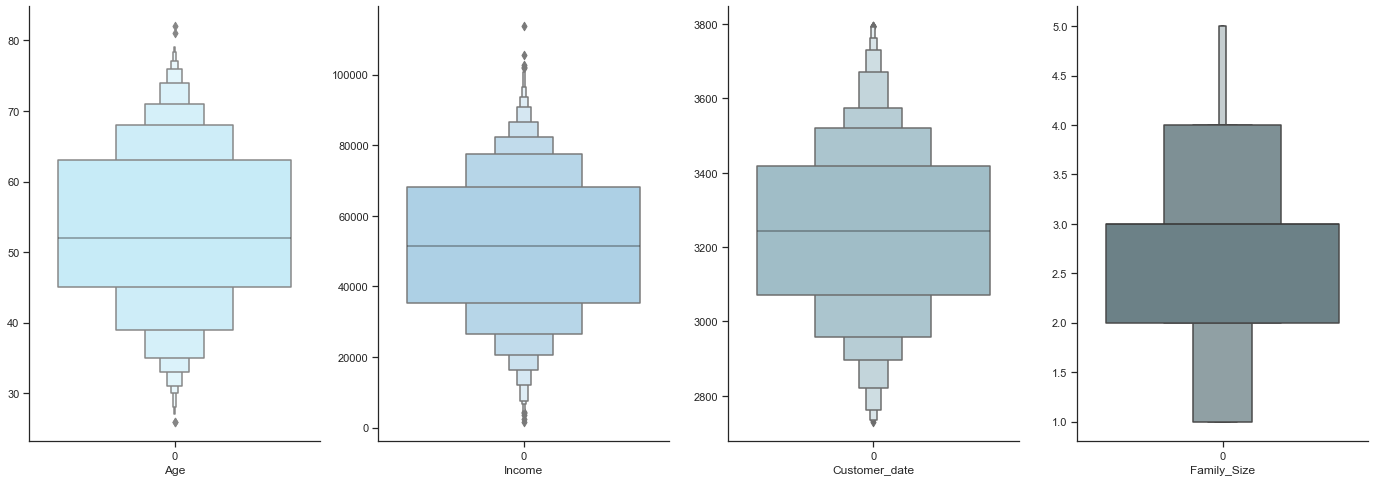

In [10]:
#examine the boxplots of different features
features= ["Age", "Income", "Customer_date", "Family_Size"]
palette = ["#BFEFFF","#A4D3EE","#9AC0CD","#68838B"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

(array([  5.,   6.,  18.,   8.,  26.,  35.,  50.,  74.,  70.,  71.,  91.,
        101., 104., 103.,  95.,  96.,  83., 115.,  88.,  89.,  84.,  96.,
        102.,  84.,  99.,  75.,  78.,  79.,  79.,  46.,  27.,  21.,  14.,
         10.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([  1730. ,   4530.1,   7330.2,  10130.3,  12930.4,  15730.5,
         18530.6,  21330.7,  24130.8,  26930.9,  29731. ,  32531.1,
         35331.2,  38131.3,  40931.4,  43731.5,  46531.6,  49331.7,
         52131.8,  54931.9,  57732. ,  60532.1,  63332.2,  66132.3,
         68932.4,  71732.5,  74532.6,  77332.7,  80132.8,  82932.9,
         85733. ,  88533.1,  91333.2,  94133.3,  96933.4,  99733.5,
        102533.6, 105333.7, 108133.8, 110933.9, 113734. ]),
 <BarContainer object of 40 artists>)

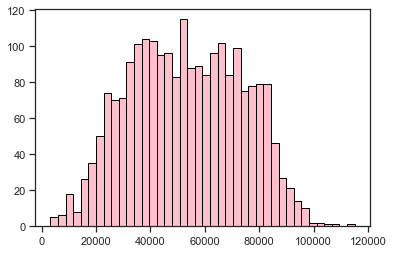

In [11]:
# Income after Outlier reduction
plt.hist(data['Income'], bins=40, align='right', color='pink', edgecolor='black') 

(array([  7.,   3.,  18.,  15.,  18.,  59.,  27.,  74.,  38.,  42.,  83.,
         39., 130.,  50.,  88., 151.,  73., 165.,  77.,  71.,  95.,  50.,
        116.,  45.,  44.,  85.,  51.,  96.,  55.,  49.,  85.,  52.,  72.,
         29.,  21.,  32.,   8.,  14.,   0.,   2.]),
 array([26. , 27.4, 28.8, 30.2, 31.6, 33. , 34.4, 35.8, 37.2, 38.6, 40. ,
        41.4, 42.8, 44.2, 45.6, 47. , 48.4, 49.8, 51.2, 52.6, 54. , 55.4,
        56.8, 58.2, 59.6, 61. , 62.4, 63.8, 65.2, 66.6, 68. , 69.4, 70.8,
        72.2, 73.6, 75. , 76.4, 77.8, 79.2, 80.6, 82. ]),
 <BarContainer object of 40 artists>)

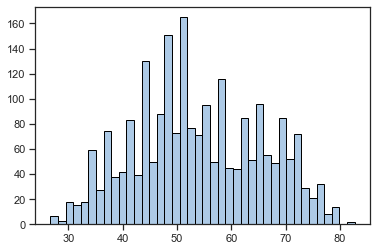

In [12]:
# Age 
plt.hist(data['Age'], bins=40, align='right', color='#adcae6', edgecolor='black')

,Response
Response,
0,1895
1,334


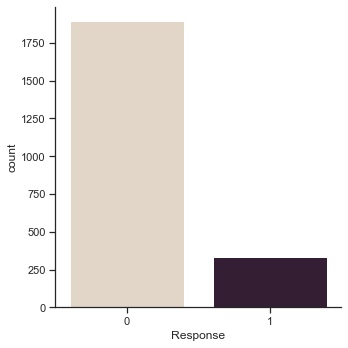

In [13]:
#checking response column

sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=data)

data.groupby(['Response']).agg({'Response':'count'})

In [14]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# splitting into training and testing data
train,test = train_test_split(data, random_state=42)

# splitting training data
X_train = train.drop('Response', axis = 1)
y_train = train['Response']

print(Counter(y_train))

Counter({0: 1421, 1: 250})


In [15]:
# Balancing training data
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print(Counter(y_train_under))

Counter({0: 250, 1: 250})


In [16]:
# splitting testing data
X_test = test.drop('Response', axis = 1).copy()
y_test = test['Response'].copy()

In [17]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
# Building a preliminary SVM
SVM_P = SVC(random_state = 42)
SVM_P.fit(X_train_scaled, y_train_under)

SVC(random_state=42)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


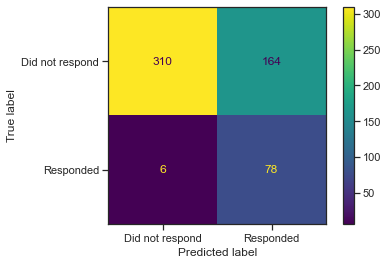

In [19]:
plot_confusion_matrix(SVM_P,
                     X_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not respond', 'Responded'])

In [20]:
#optimizing the SVM
param_grid = [
    {'C': [1, 5, 10, 100, 1000],
    'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','poly','linear', 'sigmoid']}
]

optimal_params= GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 2
)

optimal_params.fit(X_train_scaled, y_train_under)
print(optimal_params.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale,

[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   3.8s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   4.6s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   4.4s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

In [57]:
#Optimized SVM
SVM_O = SVC(random_state = 42, C = 100, gamma = 0.001, kernel = 'rbf')
SVM_O.fit(X_train_scaled, y_train_under)

SVC(C=100, gamma=0.001, random_state=42)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


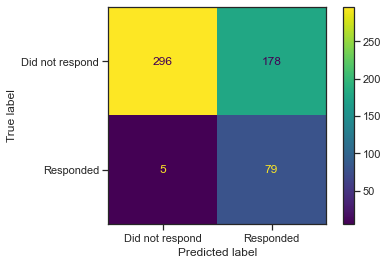

In [58]:
plot_confusion_matrix(SVM_O,
                     X_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not respond', 'Responded'])

In [59]:
# Accuracy Score Preliminary SVM
svm_cv_results_acc = cross_val_score(SVM_P, X_test_scaled, y_test, cv=5, scoring='accuracy')   
msg = "5-fold ACC for preliminary SVM: %f (%f)" % (svm_cv_results_acc.mean(), svm_cv_results_acc.std())
print(msg)

# Accuracy Score Optimized SVM
svm_cv_results_acc = cross_val_score(SVM_O, X_test_scaled, y_test, cv=5, scoring='accuracy')   
msg = "5-fold ACC for optimized SVM: %f (%f)" % (svm_cv_results_acc.mean(), svm_cv_results_acc.std())
print(msg)

5-fold ACC for preliminary SVM: 0.883526 (0.007783)
5-fold ACC for optimized SVM: 0.908639 (0.014092)


In [60]:
# predictions based on preliminary SVM
y_pred_P = SVM_P.predict(X_test_scaled)

In [61]:
# predictions based on optimized SVM
y_pred_O = SVM_O.predict(X_test_scaled)

In [62]:
# classification_report for preliminary SVM model
print(classification_report(y_test,y_pred_P))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78       474
           1       0.32      0.93      0.48        84

    accuracy                           0.70       558
   macro avg       0.65      0.79      0.63       558
weighted avg       0.88      0.70      0.74       558



In [63]:
from sklearn.metrics import roc_curve
fpr_P, tpr_P, thresholds_P = roc_curve(y_test, y_pred_P)

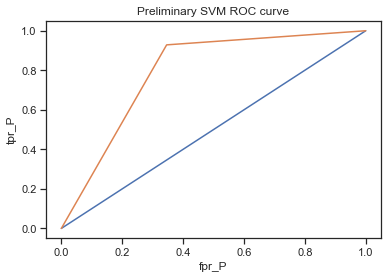

In [64]:
plt.plot([0,1],[0,1])
plt.plot(fpr_P,tpr_P, label='SVM')
plt.xlabel('fpr_P')
plt.ylabel('tpr_P')
plt.title('Preliminary SVM ROC curve')
plt.show()

In [65]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_P)

0.791289933694997

In [66]:
# classification_report for optimized SVM model
print(classification_report(y_test,y_pred_O))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76       474
           1       0.31      0.94      0.46        84

    accuracy                           0.67       558
   macro avg       0.65      0.78      0.61       558
weighted avg       0.88      0.67      0.72       558



In [67]:
fpr_O, tpr_O, thresholds_O = roc_curve(y_test, y_pred_O)

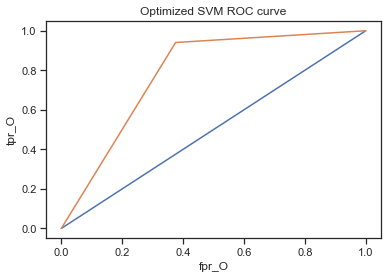

In [68]:
plt.plot([0,1],[0,1])
plt.plot(fpr_O,tpr_O, label='SVM')
plt.xlabel('fpr_O')
plt.ylabel('tpr_O')
plt.title('Optimized SVM ROC curve')
plt.show()

In [69]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_O)

0.7824743821579264

In [70]:
# import KMeans
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=5, random_state=50).fit(data)
data_Kmeans = data.copy()
data_Kmeans["Clusters"]= clusters.labels_
data_Kmeans.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Age,Family_Size,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Clusters
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3702,65,1,0,0,1,0,0,2
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2856,68,3,0,0,1,0,0,2
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3203,57,2,0,0,0,1,0,4
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2796,38,3,0,0,0,1,0,3
4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3052,41,3,0,1,0,0,0,2


In [72]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

#splitting into training and testing data
train,test = train_test_split(data, random_state=42)

# Splitting training data
X_train = train.drop('Response', axis = 1)
y_train = train['Response']

print(Counter(y_train))

#Balancing training data
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_Kmeans_train_under, y_Kmeans_train_under = undersample.fit_resample(X_train, y_train)

print(Counter(y_train_under))

Counter({0: 1421, 1: 250})
Counter({0: 250, 1: 250})


In [73]:
# Splitting testing data
X_Kmeans_test = test.drop('Response', axis = 1).copy()
y_Kmeans_test = test['Response'].copy()

In [74]:
# Scaling the data
X_Kmeans_train_scaled = scaler.fit_transform(X_Kmeans_train_under)
X_Kmeans_test_scaled = scaler.fit_transform(X_Kmeans_test)

In [75]:
#Building a preliminary SVM
SVM_P_Kmeans = SVC(random_state = 42)
SVM_P_Kmeans.fit(X_Kmeans_train_scaled, y_Kmeans_train_under)

SVC(random_state=42)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


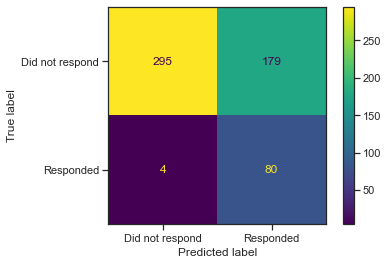

In [76]:
plot_confusion_matrix(SVM_P_Kmeans,
                     X_Kmeans_test_scaled,
                     y_Kmeans_test,
                     values_format = 'd',
                     display_labels = ['Did not respond', 'Responded'])

In [77]:
#optimizing the SVM
param_grid = [
    {'C': [1, 5, 10, 100, 1000],
    'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','poly','linear', 'sigmoid']}
]

optimal_params= GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 2
)

optimal_params.fit(X_Kmeans_train_scaled, y_Kmeans_train_under)
print(optimal_params.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale,

[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=5, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   1.4s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=  14.1s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   4.1s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   9.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   5.4s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   2.6s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

In [78]:
#Optimized SVM
SVM_O_Kmeans = SVC(random_state = 42, C = 5, gamma = 'scale', kernel = 'rbf')
SVM_O_Kmeans.fit(X_Kmeans_train_scaled, y_Kmeans_train_under)

SVC(C=5, random_state=42)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


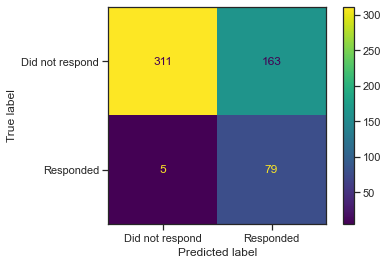

In [79]:
plot_confusion_matrix(SVM_O_Kmeans,
                     X_Kmeans_test_scaled,
                     y_Kmeans_test,
                     values_format = 'd',
                     display_labels = ['Did not respond', 'Responded'])

In [80]:
# Accuracy Score Preliminary SVM
svm_cv_results_acc = cross_val_score(SVM_P_Kmeans, X_Kmeans_test_scaled, y_Kmeans_test, cv=5, scoring='accuracy')   
msg = "5-fold ACC for preliminary SVM with Kmeans: %f (%f)" % (svm_cv_results_acc.mean(), svm_cv_results_acc.std())
print(msg)

# Accuracy Score Optimized SVM
svm_cv_results_acc = cross_val_score(SVM_O_Kmeans, X_Kmeans_test_scaled, y_Kmeans_test, cv=5, scoring='accuracy')   
msg = "5-fold ACC for optimized SVM with Kmeans: %f (%f)" % (svm_cv_results_acc.mean(), svm_cv_results_acc.std())
print(msg)

5-fold ACC for preliminary SVM with Kmeans: 0.883526 (0.007783)
5-fold ACC for optimized SVM with Kmeans: 0.881757 (0.020532)


In [81]:
#predictions based on preliminary SVM
y_pred_P_Kmeans = SVM_P_Kmeans.predict(X_Kmeans_test_scaled)
# y_pred_P_Kmeans

In [82]:
#predictions based on preliminary SVM
y_pred_O_Kmeans = SVM_O_Kmeans.predict(X_Kmeans_test_scaled)
# y_pred_O_Kmeans

In [83]:
#classification_report for preliminary SVM model
print(classification_report(y_Kmeans_test,y_pred_P_Kmeans))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       474
           1       0.31      0.95      0.47        84

    accuracy                           0.67       558
   macro avg       0.65      0.79      0.61       558
weighted avg       0.88      0.67      0.72       558



In [84]:
fpr_P_Kmeans, tpr_P_Kmeans, thresholds_P_Kmeans = roc_curve(y_test, y_pred_P_Kmeans)

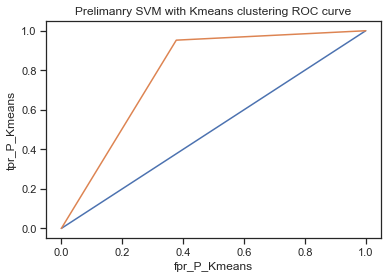

In [85]:
plt.plot([0,1],[0,1])
plt.plot(fpr_P_Kmeans,tpr_P_Kmeans, label='SVM')
plt.xlabel('fpr_P_Kmeans')
plt.ylabel('tpr_P_Kmeans')
plt.title('Prelimanry SVM with Kmeans clustering ROC curve')
plt.show()

In [86]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_P_Kmeans)

0.7873719107896323

In [87]:
#classification_report for preliminary SVM model
print(classification_report(y_Kmeans_test,y_pred_O_Kmeans))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       474
           1       0.33      0.94      0.48        84

    accuracy                           0.70       558
   macro avg       0.66      0.80      0.64       558
weighted avg       0.89      0.70      0.74       558



In [88]:
fpr_O_Kmeans, tpr_O_Kmeans, thresholds_O_Kmeans = roc_curve(y_test, y_pred_O_Kmeans)

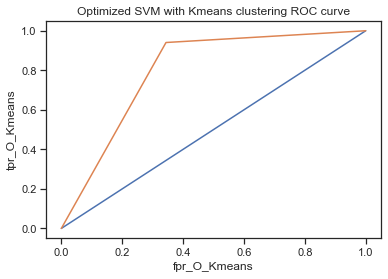

In [89]:
plt.plot([0,1],[0,1])
plt.plot(fpr_O_Kmeans,tpr_O_Kmeans, label='SVM')
plt.xlabel('fpr_O_Kmeans')
plt.ylabel('tpr_O_Kmeans')
plt.title('Optimized SVM with Kmeans clustering ROC curve')
plt.show()

In [90]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_O_Kmeans)

0.798297166968053

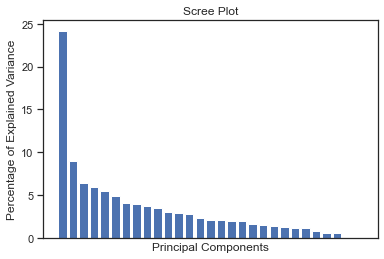

In [91]:
# Drawing the SVM decision boundry and interpreting it.

#PCA
pca = PCA()
x_train_pca = pca.fit_transform(X_train_scaled)
x_test_pca = pca.fit_transform(X_test_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [92]:
train_pc1_coords = x_train_pca[:, 0] #xaxis
train_pc2_coords = x_train_pca[:, 1] #yaxis

#center and scale the pcs
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

#optimizing the SVM fit to the x and y axis
param_grid = [
    {'C': [1, 5, 10, 100, 1000],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','poly','linear', 'sigmoid']}
]

optimal_params= GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 2
)

optimal_params.fit(pca_train_scaled, y_train_under)
print(optimal_params.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale,

[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=5, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

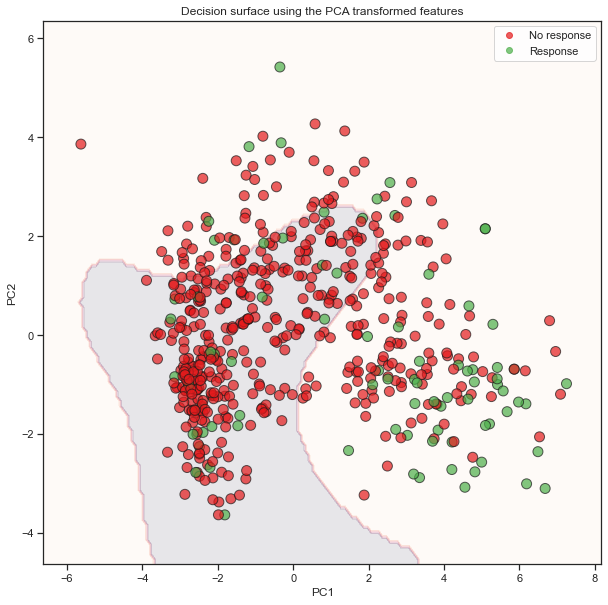

In [93]:
SVM_PCA = SVC(random_state=42, C = 5 , gamma= 0.1, kernel ='rbf' )
SVM_PCA.fit(pca_train_scaled, y_train_under)

#transforming test dataset with PCA
# x_test_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(X_Kmeans_test_scaled)

test_pc1_coords = x_test_pca[:, 0]
test_pc2_coords = x_test_pca[:, 1]

#creating a matrix to show the decision regions.
#The matrix points will be slightly larger than the PCA points.
#So that all the PCA points are plotted without being on the edge

x_min = test_pc1_coords.min() - 1 
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),
                     np.arange(start = y_min, stop = y_max, step = 0.1))

#classifying each point in matrix with SVM
Z = SVM_PCA.predict(np.column_stack((xx.ravel(), yy.ravel())))

#reshaping classification
Z = Z.reshape(xx.shape)

#plotting using the matrix values and classifications.
fig, ax = plt.subplots(figsize = (10,10))
ax.contourf(xx, yy, Z, alpha = 0.1)

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a']) #creating custom colors for actual datapoints.

#drawing actual points which will be colored by their known classifications
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_test,
                     cmap = cmap,
                     s = 100,
                     edgecolors = 'k',
                     alpha = 0.7)

#creating legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc="upper right")
legend.get_texts()[0].set_text("No response")
legend.get_texts()[1].set_text("Response")

#adding axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed features')
plt.show()